# 10 · The Conditions for Hearing Chaos

**Observational record associated with the book**  
*Discovering Chaos in Prime Numbers — Computational Investigations through the Euler Mirror*  
© Alvaro Costa, 2025

This notebook is part of a canonical sequence of computational records.  
It introduces **no new hypotheses, conjectures, or interpretative models**.

Its sole purpose is to **record** the behaviour of arithmetic structures under an explicit,  
deterministic, and reproducible observational regime.

The complete conceptual discussion is presented in the book.  
This notebook documents only the corresponding experiment.

**Licence:** Creative Commons BY–NC–ND 4.0  
Reading, execution, and citation are permitted.  
Modification, adapted redistribution, or independent commercial use are not permitted.


---

In the previous chapters, we presented evidence of a striking phenomenon: the signature of quantum chaos (GOE) emerges directly from the counting of prime numbers. The question that now arises is **why** our method reveals this connection so clearly — and what the essential conditions are for this to occur.

The answer does not lie in any single technique, but in the convergence of **three fundamental principles**. Three complementary viewpoints which, taken together, constitute the objective foundation of our investigation. These are the conditions that allow us to calibrate our “seismograph” so as to finally hear the music of chaos.

## 1. The three pillars of the investigation

### The prism of dynamics: the number line as a process

The **first condition** is a shift in paradigm: to stop viewing the number line as a static and immutable ruler, and instead to observe it as a **dynamic system in evolution**.

As we move along the line (increasing $x$), the properties of the system change. It is this dynamic perspective that makes it possible to identify distinct **regimes** — Poisson, transition, GOE — since only dynamical systems exhibit phases and can evolve from one state to another, from simple order to correlated chaos.

### The engine of creation: the “One” as an active agent

The **second condition** is to recognise the dual and essential role of the **One**. It is not merely the axiomatic starting point of arithmetic, but an **active and continuous agent** in the process.

In our methodology, the **One**, understood as the principle of succession ($+1$), acts as the force that fills the gaps and introduces **stabilisation**, counterbalancing the expansive tendency of multiplication. Without acknowledging this active role, the **structural tension** that generates the chaotic signal cannot be correctly identified or measured.

### The lens of revelation: the logarithmic scale as the natural focus

The **third condition** is the choice of an appropriate observation ruler. The logarithmic scale **is** the natural scale of the prime numbers.

This is not an artificial correction, but an adjustment of focus to the way primes are distributed and organised. This scale removes the distortion introduced by the decreasing density and allows the genuine fluctuations — the “music” arising from the interaction between expansion and stabilisation — to become audible as a statistical signature compatible with the GOE.

## 2. Visual evidence: cause and effect

To illustrate visually the interaction between these three pillars, the code below generates two complementary plots.

The lower plot makes **Pillar 3** explicit, showing the “stable stage” provided by the logarithmic scale.  
The upper plot illustrates **Pillar 1**, displaying the dynamic evolution of the system upon that same stage.


Starting analysis for N = 100,000,000...
-> 5,761,455 primes generated in 0.26 seconds.


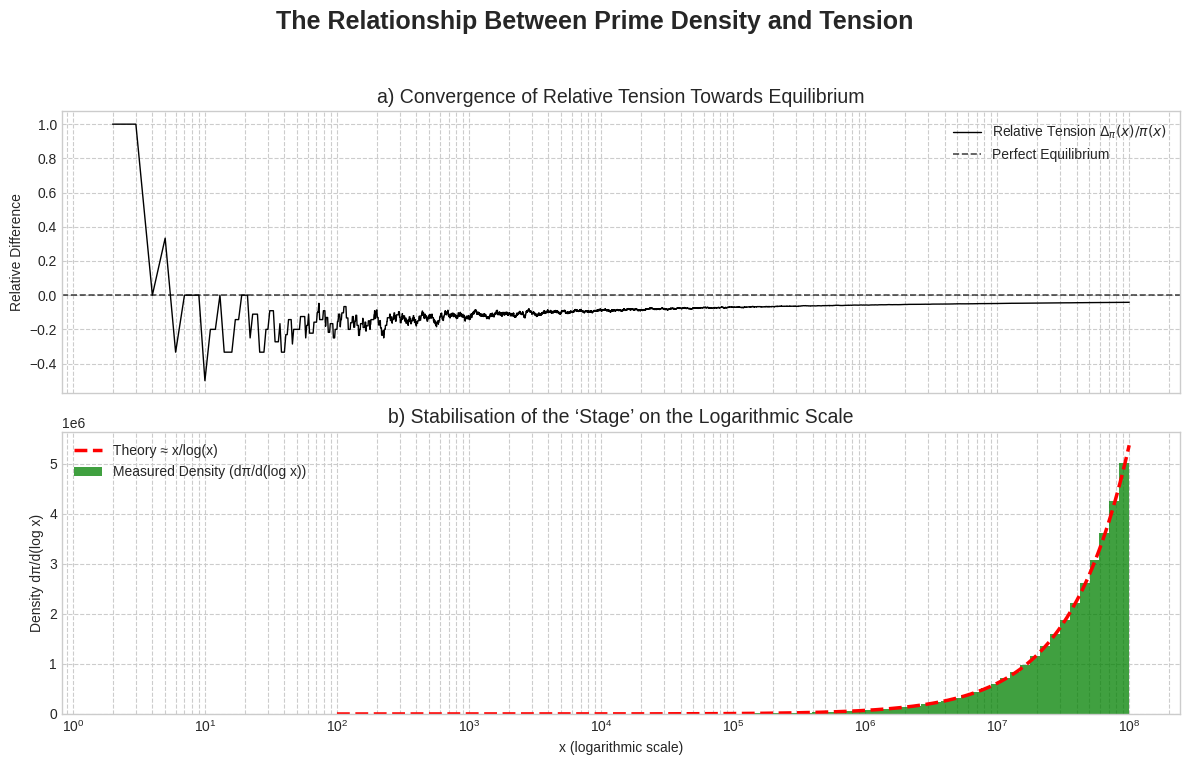

In [1]:
# Requirements: matplotlib, numpy
# This unified and optimised script generates two stacked plots up to N = 10**8.

import numpy as np
import matplotlib.pyplot as plt
import time

# --- 1. OPTIMISED PRIME GENERATION (THE MAIN ENGINE) ---
def generate_primes_upto(n: int) -> np.ndarray:
    """Generates an array of all primes up to n using an optimised sieve and direct construction."""
    if n < 2:
        return np.array([], dtype=np.int64)
    
    # Sieve for odd numbers starting from 3
    size = (n - 1) // 2
    sieve = np.ones(size, dtype=bool)
    
    limit = int(np.sqrt(n)) // 2
    for i in range(limit):
        if sieve[i]:
            p = 2 * i + 3
            start = (p * p - 3) // 2
            sieve[start::p] = False
            
    # Build the array of odd primes from the sieve results
    indices = np.where(sieve)[0]
    odd_primes = 2 * indices + 3
    
    # Prepend the prime 2 and return
    return np.concatenate((np.array([2], dtype=np.int64), odd_primes))

# --- 2. COMPUTATION FUNCTIONS FOR EACH PLOT ---
def calculate_delta_pi_at_points(x_points: np.ndarray, primes: np.ndarray):
    """Computes the Relative Tension for Plot 1."""
    pi_x = np.searchsorted(primes, x_points, side='right')
    pi_S_x = np.searchsorted(primes, x_points / 2, side='right')
    pi_N_x = pi_x - pi_S_x
    delta_pi = pi_N_x - pi_S_x
    pi_x_safe = np.where(pi_x == 0, np.nan, pi_x)
    return delta_pi / pi_x_safe

def calculate_log_density_in_bins(bin_edges_log: np.ndarray, primes: np.ndarray):
    """Computes the Logarithmic Density for Plot 2."""
    pi_at_edges = np.searchsorted(primes, bin_edges_log, side='right')
    prime_counts_log = np.diff(pi_at_edges)
    log_bin_widths = np.diff(np.log(bin_edges_log))
    return prime_counts_log / log_bin_widths

# --- 3. MAIN PLOTTING FUNCTION ---
def generate_combined_plot(N_max):
    """Orchestrates data generation and plotting of the two figures."""
    print(f"Starting analysis for N = {N_max:,}...")
    
    # Step 1: Single prime generation (most expensive computation)
    start_time = time.time()
    primes = generate_primes_upto(N_max)
    end_time = time.time()
    print(f"-> {len(primes):,} primes generated in {end_time - start_time:.2f} seconds.")
    
    # Step 2: Create a figure with two stacked subplots sharing the x-axis
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    fig.suptitle("The Relationship Between Prime Density and Tension", fontsize=18, weight='bold')

    # --- PLOT 1 (TOP): RELATIVE TENSION ---
    ax1 = axes[0]
    num_points_tension = 20000
    x_points_tension = np.logspace(
        np.log10(2),
        np.log10(N_max),
        num=num_points_tension,
        dtype=np.int64
    )
    x_points_tension = np.unique(x_points_tension)
    delta_pi_ratio = calculate_delta_pi_at_points(x_points_tension, primes)
    
    ax1.semilogx(
        x_points_tension,
        delta_pi_ratio,
        linewidth=1.0,
        color='black',
        label=r"Relative Tension $\Delta_\pi(x)/\pi(x)$"
    )
    ax1.axhline(
        0,
        linestyle="--",
        color='black',
        linewidth=1.2,
        alpha=0.7,
        label="Perfect Equilibrium"
    )
    ax1.set_ylabel("Relative Difference")
    ax1.set_title(
        r"a) Convergence of Relative Tension Towards Equilibrium",
        fontsize=14
    )
    ax1.legend()
    ax1.grid(True, which="both", ls="--")

    # --- PLOT 2 (BOTTOM): LOGARITHMIC DENSITY ---
    ax2 = axes[1]
    num_bins_log = 80
    bin_edges_log = np.logspace(
        2,
        np.log10(N_max),
        num=num_bins_log + 1,
        dtype=np.int64
    )
    densities_log = calculate_log_density_in_bins(bin_edges_log, primes)
    
    ax2.bar(
        bin_edges_log[:-1],
        densities_log,
        width=np.diff(bin_edges_log),
        align='edge',
        alpha=0.75,
        label='Measured Density (dπ/d(log x))',
        color='green'
    )
    
    # Theoretical curve for validation
    x_theory = np.logspace(2, np.log10(N_max), 500)
    y_theory = x_theory / np.log(x_theory)
    scaling_factor = (
        np.mean(densities_log)
        / np.mean(x_theory / np.log(x_theory))
    )  # Simplified scaling
    ax2.plot(
        x_theory,
        y_theory * scaling_factor,
        color='red',
        lw=2.5,
        ls='--',
        label='Theory ≈ x/log(x)'
    )

    ax2.set_xlabel("x (logarithmic scale)")
    ax2.set_ylabel("Density dπ/d(log x)")
    ax2.set_title(
        "b) Stabilisation of the ‘Stage’ on the Logarithmic Scale",
        fontsize=14
    )
    ax2.legend()
    ax2.grid(True, which="both", ls="--")
    ax2.set_ylim(bottom=0)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# --- EXECUTION ---
N_MAX = 10**8
generate_combined_plot(N_MAX)


---

## 3. Analysis of the visual results

Plot **(b)**, in the lower panel, demonstrates **Pillar 3**. It shows how the logarithmic lens transforms the collapse of prime density into a smooth and predictable growth law (red curve). It is this predictability of the background that creates the **stable stage** required for spectral analysis.

With this stage in place, plot **(a)**, in the upper panel, illustrates **Pillar 1**. It functions as an “electrocardiogram” of the dynamical system, displaying the evolution of the relative tension: it begins in a regime of high instability, passes through a well-defined transition phase, and converges towards a state of fluctuating equilibrium.

It is in this final regime of stability — rendered observable by the logarithmic stage — that the music of chaos becomes audible, generated by the structural tension associated with **Pillar 2**.

## 4. Methodological synthesis: the recipe for chaos

The methodology of this investigation emerges from the rigorous intersection of these three viewpoints:

By observing the **number line as a dynamical process (1)**, it becomes possible to measure the tension between expansion and **stabilisation induced by the One (2)**. When this signal is observed through the **natural lens of the primes (3)**, the universal signature of quantum chaos emerges unequivocally.

It is this combination — rather than any isolated artifice — that makes it possible to transform the simple counting of primes into a direct observation of the physics of chaos.
